# Loading Data from CSVs

In [257]:
#DictReader used because our file contains header

import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as file:
        read_file = unicodecsv.DictReader(file)
        return list(read_file)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submission = read_csv('project_submissions.csv')

In [258]:
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': '2014-11-10',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_udacity': 'True',
 'is_canceled': 'True'}

In [259]:
daily_engagement[0]

{'acct': '0',
 'utc_date': '2015-01-09',
 'num_courses_visited': '1.0',
 'total_minutes_visited': '11.6793745',
 'lessons_completed': '0.0',
 'projects_completed': '0.0'}

In [260]:
project_submission[0]

{'creation_date': '2015-01-14',
 'completion_date': '2015-01-16',
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

# Adusting Data Types

In [261]:
from datetime import datetime as dt

#take a date as a string and return a python datetime object

def parse_date(date):
    if date=='':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
    
#takes a string which is either an empty string or an integer and return int or none

def parse_int(i):
    if i=='':
        return None
    else:
        return int(i)

In [262]:
#let clean up the data types in enrollments.csv

for enroll in enrollments:
    enroll['cancel_date'] = parse_date(enroll['cancel_date'] )
    enroll['join_date'] = parse_date(enroll['join_date'] )
    enroll['days_to_cancel'] = parse_int(enroll['days_to_cancel'] )
    enroll['is_udacity'] = enroll['is_udacity'] == 'True'
    enroll['is_canceled'] = enroll['is_canceled'] == 'True'


enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [263]:
#clean up the data of daily_engagement.csv

for engagement in daily_engagement:
    engagement['utc_date'] = parse_date(engagement['utc_date'])
    engagement['num_courses_visited'] = int(float(engagement['num_courses_visited']))
    engagement['total_minutes_visited'] = float(engagement['total_minutes_visited'])
    engagement['lessons_completed']= int(float(engagement['lessons_completed']))
    engagement['projects_completed']= int(float(engagement['projects_completed']))
    
daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [264]:
# Clean up the data types in the submissions.csv

for submission in project_submission:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submission[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

# Investigating the Data

In [265]:
#Change name of the column 'acct' to 'account_key' in daily engagement table to have similarity with other tables

for record in daily_engagement:
    record['account_key'] = record['acct']
    del [record['acct']]

daily_engagement[0]

{'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0,
 'account_key': '0'}

In [266]:
#generic function to get unique students from each table

def unique_students(data):
    unique_students = set()
    for student in data:
        unique_students.add(student['account_key'])
    return unique_students

In [267]:
#total number of rows or enrollments in enrollments.csv

len(enrollments)

1640

In [268]:
#total number of unique enrollments in enrollments.csv

unique_enrollment_students = unique_students(enrollments) #enrollments table
len(unique_enrollment_students)

1302

In [269]:
#total rows or engagements in daily_engagement.csv

len(daily_engagement)

136240

In [270]:
#total number of unique engagements in daily_engagement.csv

unique_daily_engagement_students = unique_students(daily_engagement) #daily_engagement table
len(unique_daily_engagement_students)

1237

In [271]:
# Total number of submitted projects

len(project_submission)

3642

In [272]:
#Total number of unique students submitted projects

unique_project_submitters = unique_students(project_submission)
len(unique_project_submitters)

743

# Dealing with missing engagement records

In [273]:
#finding a student missing from engagement table (student enrolled but have no engagement)
 
for enroll in enrollments:
    student_id = enroll['account_key'] 
    if student_id not in unique_daily_engagement_students:
        print(enroll)
        break

{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


#In the above output: joining and cancelling date is exactly the same, and the days_to_cancel is 0 because there is no record in engagment table for that student. Student needs to be enrolled for a full day before their engagment to be recorded

In [274]:
#some more surprising data points
#These are the students who are enrolled, stayed enrolled atleast a day, but don't have engagement numbers

num_prob_students=0
for enroll in enrollments:
    student_id = enroll['account_key'] 
    if student_id not in unique_daily_engagement_students and enroll['join_date'] != enroll['cancel_date']:
        num_prob_students += 1
        print(enroll)

num_prob_students

{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1101', 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': True, 'is_canceled': False}


3

#In the above output we can see that the field is_udacity : True which means these are test accounts which shouldn't be included in analysis. Next we have to identify all the test data and should exclude it from our analysis

# Identifying and Removing test data

In [275]:
#identifying test accounts
test_accounts= set()
for enroll in enrollments:
    if enroll['is_udacity']:
        test_accounts.add(enroll['account_key'])

len(test_accounts)

6

In [276]:
#removing the test accounts

def remove_test_accounts(data):
    no_test_accounts= []
    for each_record in data:
        if each_record['account_key'] not in test_accounts:
            no_test_accounts.append(each_record)
    return no_test_accounts

In [277]:
#filtered data without test accounts from all the tables

without_test_enrollment_data = remove_test_accounts(enrollments)
without_test_engagement_data = remove_test_accounts(daily_engagement)
without_test_submission_data = remove_test_accounts(project_submission)

print(len(without_test_enrollment_data))
print(len(without_test_engagement_data))
print(len(without_test_submission_data))

1622
135656
3634


# Refining the Question a bit more

In [278]:
#Creating a dictionary mapping
#students who are successfully enrolled and not yet cancelled the course till 7 days to their most recent joined date
 
paid_reg_students = {}

for enroll in without_test_enrollment_data:
    if not enroll['is_canceled'] or enroll['days_to_cancel'] > 7:
        account_key = enroll['account_key']
        enrollment_date= enroll['join_date']
        
        if account_key not in paid_reg_students or enrollment_date > paid_reg_students[account_key]:#latest enrolled students
            paid_reg_students[account_key] = enrollment_date

len(paid_reg_students)
        

995

# Dealing with the data of First Week

In [279]:
#first we have to remove the free trials students who have not paid

def remove_free_trial_cancels(data):
    paid_data_only = []
    for row in data:
        if row['account_key'] in paid_reg_students:
            paid_data_only.append(row)
    return paid_data_only

In [280]:
# Remove data from students who canceled within 7 days from all three csv files

paid_enrollments_only= remove_free_trial_cancels(without_test_enrollment_data)
paid_engagements_only= remove_free_trial_cancels(without_test_engagement_data)
paid_submissions_only= remove_free_trial_cancels(without_test_submission_data)

print(len(paid_enrollments_only))
print(len(paid_engagements_only))
print(len(paid_submissions_only))

1293
134549
3618


In [281]:
# Create a new binary field with name 'visited' , 
#which is equal to 1 if the student visited at least one course, and 0 otherwise.

for engagement in paid_engagements_only:
    if engagement['num_courses_visited'] > 0:
        engagement['visited'] = 1
    else:
        engagement['visited'] = 0

In [282]:
#takes student's joining date and date of specific engagement record
#and returns true if the engagement happened within one week of student's joining date

def within_one_week(join_date, engagement_date):
    time_diff = engagement_date - join_date
    return time_diff.days < 7 and time_diff.days >=0

In [283]:
#create a list of those students who have engagements in the first week of most recent enrollment
paid_engagements_within_first_week = []

for engagement_record in paid_engagements_only:
    account_key= engagement_record['account_key']
    join_date = paid_reg_students[account_key]
    engagement_record_date= engagement_record['utc_date']
    
    if within_one_week(join_date,engagement_record_date): 
        paid_engagements_within_first_week.append(engagement_record)

len(paid_engagements_within_first_week)

6919

# Insights about Student Engagements

In [284]:
from collections import defaultdict

#create a dictionary of engagement data grouped by account key
#key= account_key fields in the data
#values= lists of data points

def get_group_data(data, key_field_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_field_name]
        grouped_data[key].append(data_point)
    return grouped_data

In [285]:
#Here we passed engagement data to create a dictionary of grouped engagements by account key
engagement_by_account = get_group_data(paid_engagements_within_first_week, 'account_key')

In [286]:
#Now this function takes a dictionary of above grouped data, as well as a field name to be summed over,
# and returns a new dictionary with that field summed up and other fields discarded.

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
            summed_data[key] = total
    return summed_data

# The keys of the resulting dictionary are the same as the keys of the original,
# and the values are numbers containing the total value of the given field across all data points for the
# associated key.

# Analysis with the field 'Total_minutes_visited'

In [287]:
 total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

In [288]:
#now I am interested to calculate values (keys are irrelevant now)
 #.values() method will give us only values from this dictionary
    
total_minutes = list(total_minutes_by_account.values()) 

Mean: 306.70832675342825
Standard Dev: 412.99693340852957
Min: 0.0
Max: 3564.7332644989997


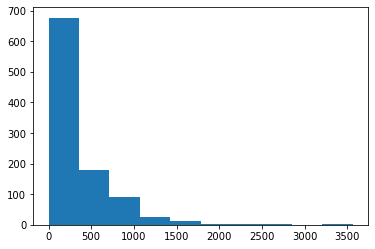

In [302]:
#summary of the given data along with histogram
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def summarize_data(data):
    print ('Mean:', np.mean(data))
    print ('Standard Dev:', np.std(data))
    print ('Min:', np.min(data))
    print ('Max:', np.max(data))
    plt.hist(data)

summarize_data(total_minutes)

In [290]:
#to investigate a student who has max number of minutes spent

student_with_max_minutes = None
max_minutes =0
for student, total_min in total_minutes_by_account.items():
    if total_min > max_minutes:
        max_minutes= total_min
        student_with_max_minutes = student

max_minutes

3564.7332644989997

# Students with maximum minutes spent

In [291]:
#NOw comparing the student with engagment record
#print every engagement record and also total number of such engagements

total_records_of_max_minutes=0
for engagement_record in paid_engagements_within_first_week:
    if engagement_record['account_key']== student_with_max_minutes:
        print (engagement_record)
        total_records_of_max_minutes +=1
    
print('total_records_of_max_minutes: ', total_records_of_max_minutes)

{'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'num_courses_visited': 4, 'total_minutes_visited': 850.519339666, 'lessons_completed': 4, 'projects_completed': 0, 'account_key': '163', 'visited': 1}
{'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'num_courses_visited': 6, 'total_minutes_visited': 872.633923334, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163', 'visited': 1}
{'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'num_courses_visited': 2, 'total_minutes_visited': 777.018903666, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163', 'visited': 1}
{'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 294.568774, 'lessons_completed': 2, 'projects_completed': 0, 'account_key': '163', 'visited': 1}
{'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'num_courses_visited': 3, 'total_minutes_visited': 471.2139785, 'lessons_completed': 1, 'projects_completed': 0, 'account_key': '163', 'visited':

# Analysis with the field 'lessons_completed'

In [292]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

Mean: 1.636180904522613
Standard Dev: 3.002561299829423
Min: 0
Max: 36


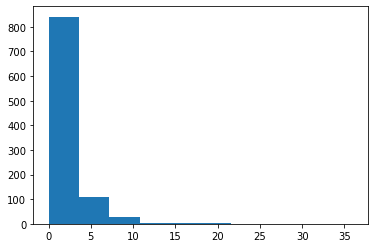

In [293]:
summarize_data(list(lessons_completed_by_account.values()))

# Analysis with field 'visited'

In [294]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'visited')

Mean: 2.8673366834170855
Standard Dev: 2.2551980029196814
Min: 0
Max: 7


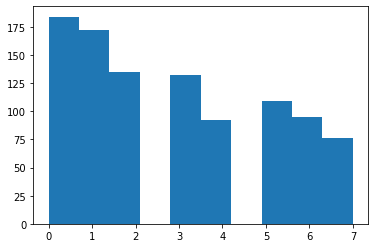

In [295]:
summarize_data(list(days_visited_by_account.values()))

# Determining Passed Students

In [296]:
#Determine how many students have passed the subway project using table project_submissions.csv
#create a set of accounts that passed the subway project

subway_project_lesson_keys= ['746169184','3176718735']
passed_students_subway_project= set()

for submission in project_submission:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        passed_students_subway_project.add(submission['account_key'])

len(passed_students_subway_project)

653

In [297]:
#Engagements of students who pass/do not pass the subway project

passing_engagement= []
non_passing_engagement= []

for engagement in paid_engagements_within_first_week:
    if engagement['account_key'] in passed_students_subway_project:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


# Comparasion of Both Student Groups

In [298]:
passing_engagement_by_account = get_group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = get_group_data(non_passing_engagement, 'account_key')

Non-passing students:
Mean: 143.32647426675584
Standard Dev: 269.5386190114951
Min: 0.0
Max: 1768.5227493319999


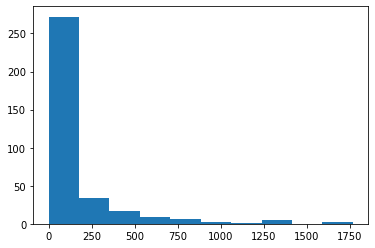

Passing students:
Mean: 394.58604648350865
Standard Dev: 448.4995193265521
Min: 0.0
Max: 3564.7332644989997


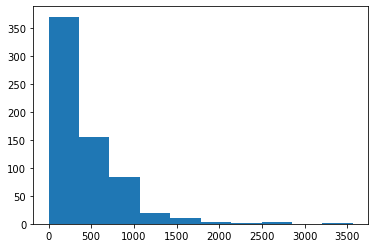

In [299]:
#Total Minutes spent COMPARASION

print ('Non-passing students:')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
summarize_data(list(non_passing_minutes.values()))


# Adding plt.show() after each plot, to show each plot seperately
plt.show()

print ('Passing students:')
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
summarize_data(list(passing_minutes.values()))

plt.show()

non-passing students:
Mean: 0.8620689655172413
Standard Dev: 2.5491599418312028
Min: 0
Max: 27


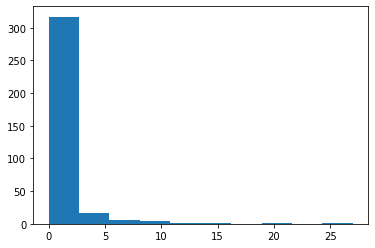

passing students:
Mean: 2.052550231839258
Standard Dev: 3.1422270555779344
Min: 0
Max: 36


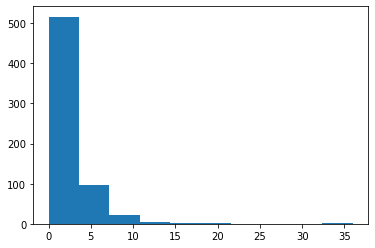

In [300]:
#Comparasion of Total Lessons Completed

print ('non-passing students:')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
summarize_data(list(non_passing_lessons.values()))

plt.show()

print ('passing students:')
passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
summarize_data(list(passing_lessons.values()))

plt.show()

non-passing students:
Mean: 1.9051724137931034
Standard Dev: 1.9057314413619046
Min: 0
Max: 7


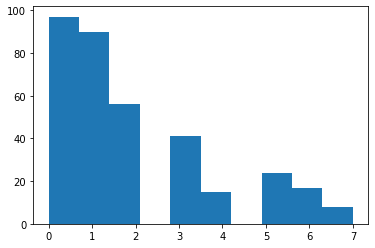

passing students:
Mean: 3.384853168469861
Standard Dev: 2.2588214709184595
Min: 0
Max: 7


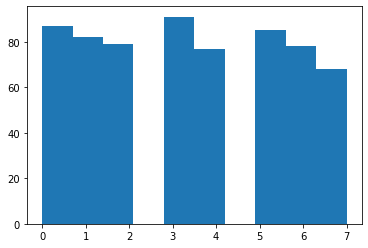

In [301]:
#Comparasion of Total Visits

print ('non-passing students:')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'visited')
summarize_data(list(non_passing_visits.values()))

plt.show()

print ('passing students:')
passing_visits = sum_grouped_items(passing_engagement_by_account, 'visited')
summarize_data(list(passing_visits.values()))

plt.show()